# FAIRe Qualitäts-KPIs
Autor: Jan Wech 
Datum:24.10.2023

## Forschungsfrage
Inwiefern hängt die Qualität der gebauten Legofahrzeuge von den ausgewählten Bauteilen, und den damit verbundenen Key Performance Indicators (KIPs) ab? Inwieweit kann man dadurch zum Beispiel den Preis und die Fahrzeugmasse beeinflussen bzw. verbessern? 

## Erstes Fahrzeug


### Versuchsziel
Mit dem Bau des ersten Autos, möchte ich schauen, ob sich eine hohe Anzahl an Bauelementen bzw. der verbauten Einzelteile, sich im Preis bzw. der Fahrzeugmasse bemerkbar macht. Daher möchte ich mein Erstes Auto ziemlich Aufwendig gestalten!

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):



Beschreiben Sie kurz und präzise Ihr Fahrzeug:Das Auto besitzt zwei lange Brickstangen (parallel zueinander ausgerichtet), welche das Hauptchassis bilden, an den die weiteren Bauteile befestigt sind. An jeden der beiden Brickstangen sind jeweils vorne und hinten ein Brickbaustein mit einem Loch befestigt. Diese sind das Verbindungsglied von den Achsenstangen und dem Hauptchassis. An der Frontachse befinden sich links und rechts jeweils die Fronträder. In der Mitte vom Chassi befind sich der Large Motor, der über vier Steckverbindungen mit dem Cassis verbunden ist. Der Motor wiederrum treibt das kleine graue Zahnrad an, welches das Moment an ein Kegelrad überträgt und somit die Hinterachse antreibt. Die Batterie befindet sich überhalb des Hauptchassis, und ist mittels Steckverbindungen und weiteren zwei Brickstangen mit dem Chassis verbunden. Zuletzt ist noch zu erwähnen, dass die Räder durch gelbe Bushes vom Fahrzeug abgetrennt sind.

![Auto_1](figures/Auto_1.png)

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [49]:
import json
import pprint
from functions import calculation_rules
from functions.classes import *

# importieren der Modul Classes für die Aggregation
from functions.classes import LegoComponent
from functions.classes import LegoAssembly
from functions.classes import AggregationLayer
from functions.classes import KPIEncoder
from functions.classes import print_assembly_tree


In [50]:
# initialize components
 
# Achsen
    
# importieren der Achsen für Fahrwerk und Antrieb
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
#Auswahl der Achse
#print(axles["3737"])

#Komponente Frontachse erstellen
front_axle = LegoComponent("front axle", axles["3737"])

#Erstellen der hinteren Achse
back_axle = front_axle.clone("back axle")

#Getriebeachse erstellen
gear_axle = LegoComponent("gear axle", axles["32073"])

# Chassis

#importieren der Chassisteile
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)

#Erstellen Technic Bushes für Reifen
Technic_Bush_Front_right = LegoComponent("Technic Bush front right", frame["3713"])
Technic_Bush_Front_left = Technic_Bush_Front_right.clone("Technic Bush front left")
Technic_Bush_back_right = Technic_Bush_Front_right.clone("Technic Bush back right")
Technic_Bush_back_left = Technic_Bush_Front_left.clone("Technic Bush back left")

#Erstellen des Getriebe Technic Bush für kleines Zahnrad durch Klonen 
Technic_Bush_small = Technic_Bush_Front_right.clone("Technic Bush small")

#Erstellen des Getriebe Technic Bush für großes Zahnrad durch Klonen 
Technic_Bush_big = Technic_Bush_Front_right.clone("Technic Bush big")

#Erstellen der langen Bricks für das Chassis
Brick_long_right= LegoComponent("Brick long right", frame["3703"])
Brick_long_left= Brick_long_right.clone("Brick long left")

#Erstellen der kurzen Bricks für die Befestigung Batterie
Brick_short_right= LegoComponent("Brick short right", frame["3702"])
Brick_short_left= Brick_short_right.clone("Brick short left")

#Erstellen der kurzen Pins für die Befestigung des Motors
Short_Pin_front_right= LegoComponent("Short Pin front right", frame["3673"])
Short_Pin_front_left= Short_Pin_front_right.clone("Short Pin front left")
Short_Pin_back_right= Short_Pin_front_right.clone("Short Pin back right")
Short_Pin_back_left= Short_Pin_front_right.clone("Short Pin back left")

#Erstellen der langen Pins für die Befestigung der Batterie
Long_Pin_front_right= LegoComponent("Long Pin front right", frame["32054"])
Long_Pin_front_left= Long_Pin_front_right.clone("Long Pin front left")
Long_Pin_back_right= Long_Pin_front_right.clone("Long Pin back right")
Long_Pin_back_left= Long_Pin_front_right.clone("Long Pin back left")

#Erstellen der kleinen Bricks für die Befestigung Achsen
Brick_one_hole_front_right= LegoComponent("Brick one hole front right", frame["3700"])
Brick_one_hole_front_left=Brick_one_hole_front_right.clone("Brick one hole front left")
Brick_one_hole_back_right=Brick_one_hole_front_right.clone("Brick one hole back right")
Brick_one_hole_back_left=Brick_one_hole_front_right.clone("Brick one hole back left")

# Reifen

#importieren Reifen für Fahrwerk
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)

#Erstellen der vorderen Reifen als Komponente    
front_wheel_right = LegoComponent(
"front wheel right", wheels["56904c02"], surface="rough", paint="glossy")
front_wheel_left=front_wheel_right.clone("front wheel left")

#Erstellen der Hinterreifen durch Klonen   
back_wheel_right = front_wheel_right.clone("back wheel right")
back_wheel_left=front_wheel_left.clone("back wheel left")

# Zahnräder

# importieren der Zahnräder für Getriebe
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)

#kleines Zahnrad erstellen
small_gear=LegoComponent("small gear", gears["3647"])
    
#großes Zahnrad erstellen
big_gear=LegoComponent("big gear", gears["3650"])

# Motor

# importieren des Motors
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)

#Erstellen der Motorkomponente 
large_Motor= LegoComponent("large Motor", motors["88003-1"])

# Batterie

# importieren der Batterie
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)

#Erstellen der Motorkomponente 
Electric_Power_9V= LegoComponent("Electric Power 9V", batteries["8881-1"])
 


In [51]:
### set properties

# Achsen

# Eigenschaften Frontachse
front_axle.properties["color"] = "red"
#Eigenschaften Frontachse anzeigen lassen
print(front_axle.properties["label"])
pprint.pprint(front_axle.properties)

#Eigenschaften Hinterachse
back_axle.properties["color"] = "red"
back_axle.properties.update(axles["3737"])
#Eigenschaften Hinterachse anzeigen lassen
print(back_axle.properties["label"])
pprint.pprint(back_axle.properties)

# Eigenschaften Getriebeachse
gear_axle.properties["color"] = "red"
#Eigenschaften Frontachse anzeigen lassen
print(gear_axle.properties["label"])
pprint.pprint(gear_axle.properties)

#Chassisteile

# Eigenschaften Technic Bush vorne rechts
Technic_Bush_Front_right.properties["color"]="yellow"
#Eigenschaften Technic Bush vorne rechts anzeigen lassen
print(Technic_Bush_Front_right.properties["label"])
pprint.pprint(Technic_Bush_Front_right.properties)

# Eigenschaften Technic Bush vorne links
Technic_Bush_Front_left.properties["color"]="yellow"
#Eigenschaften Technic Bush vorne links anzeigen lassen
print(Technic_Bush_Front_left.properties["label"])
pprint.pprint(Technic_Bush_Front_left.properties)

# Eigenschaften Technic Bush hinten rechts
Technic_Bush_back_right.properties["color"]="yellow"
#Eigenschaften Technic Bush hinten rechts anzeigen lassen
print(Technic_Bush_back_right.properties["label"])
pprint.pprint(Technic_Bush_back_right.properties)

# Eigenschaften Technic Bush hinten links
Technic_Bush_back_left.properties["color"]="yellow"
#Eigenschaften Technic Bush hinten links anzeigen lassen
print(Technic_Bush_back_left.properties["label"])
pprint.pprint(Technic_Bush_back_left.properties)

# Eigenschaften Technic Bush kleines Zahnrad
Technic_Bush_small.properties["color"]="red"
#Eigenschaften Technic Bush kleines Zahnrad anzeigen lassen
print(Technic_Bush_small.properties["label"])
pprint.pprint(Technic_Bush_small.properties)

# Eigenschaften Technic Bush großes Zahnrad
Technic_Bush_big.properties["color"]="red"
#Eigenschaften Technic Bush großes Zahnrad anzeigen lassen
print(Technic_Bush_big.properties["label"])
pprint.pprint(Technic_Bush_big.properties)

# Eigenschaften des langen Bricks rechts
Brick_long_right.properties["color"]="red"
#Eigenschaften langen Bricks rechts anzeigen lassen
print(Brick_long_right.properties["label"])
pprint.pprint(Brick_long_right.properties)

# Eigenschaften des langen Bricks links
Brick_long_left.properties["color"]="red"
#Eigenschaften langen Bricks links anzeigen lassen
print(Brick_long_left.properties["label"])
pprint.pprint(Brick_long_left.properties)

# Eigenschaften des kurzen Bricks rechts
Brick_short_right.properties["color"]="red"
#Eigenschaften kurzen Bricks rechts anzeigen lassen
print(Brick_short_right.properties["label"])
pprint.pprint(Brick_short_right.properties)

# Eigenschaften des kurzen Bricks links
Brick_short_left.properties["color"]="red"
#Eigenschaften kurzen Bricks links anzeigen lassen
print(Brick_short_left.properties["label"])
pprint.pprint(Brick_short_left.properties)

# Eigenschaften des kurzen Pins vorne rechts
Short_Pin_front_right.properties["color"]="red"
#Eigenschaften kurzen Bricks vorne rechts anzeigen lassen
print(Short_Pin_front_right.properties["label"])
pprint.pprint(Short_Pin_front_right.properties)

# Eigenschaften des kurzen Pins vorne links
Short_Pin_front_left.properties["color"]="red"
#Eigenschaften kurzen Bricks vorne links anzeigen lassen
print(Short_Pin_front_left.properties["label"])
pprint.pprint(Short_Pin_front_left.properties)

# Eigenschaften des kurzen Pins hinten rechts
Short_Pin_back_right.properties["color"]="red"
#Eigenschaften kurzen Bricks hinten rechts anzeigen lassen
print(Short_Pin_back_right.properties["label"])
pprint.pprint(Short_Pin_back_right.properties)

# Eigenschaften des kurzen Pins hinten links
Short_Pin_back_left.properties["color"]="red"
#Eigenschaften kurzen Bricks hinten links anzeigen lassen
print(Short_Pin_back_left.properties["label"])
pprint.pprint(Short_Pin_back_left.properties)

# Eigenschaften des langen Pins vorne rechts
Long_Pin_front_right.properties["color"]="red"
#Eigenschaften langen Pins vorne rechts anzeigen lassen
print(Long_Pin_front_right.properties["label"])
pprint.pprint(Long_Pin_front_right.properties)

# Eigenschaften des langen Pins vorne links
Long_Pin_front_left.properties["color"]="red"
#Eigenschaften langen Pins vorne links anzeigen lassen
print(Long_Pin_front_left.properties["label"])
pprint.pprint(Long_Pin_front_left.properties)

# Eigenschaften des langen Pins hinten rechts
Long_Pin_back_right.properties["color"]="red"
#Eigenschaften langen Pins hinten rechts anzeigen lassen
print(Long_Pin_back_right.properties["label"])
pprint.pprint(Long_Pin_back_right.properties)

# Eigenschaften des langen Pins hinten links
Long_Pin_back_left.properties["color"]="red"
#Eigenschaften langen Pins hinten links anzeigen lassen
print(Long_Pin_back_left.properties["label"])
pprint.pprint(Long_Pin_back_left.properties)

# Eigenschaften des kleinen Bricks vorne rechts
Brick_one_hole_front_right.properties["color"]="red"
#Eigenschaften kleinen Bricks vorne rechts anzeigen lassen
print(Brick_one_hole_front_right.properties["label"])
pprint.pprint(Brick_one_hole_front_right.properties)

# Eigenschaften des kleinen Bricks vorne links
Brick_one_hole_front_left.properties["color"]="red"
#Eigenschaften kleinen Bricks vorne links anzeigen lassen
print(Brick_one_hole_front_left.properties["label"])
pprint.pprint(Brick_one_hole_front_left.properties)

# Eigenschaften des kleinen Bricks hinten rechts
Brick_one_hole_back_right.properties["color"]="red"
#Eigenschaften kleinen Bricks hinten rechts anzeigen lassen
print(Brick_one_hole_back_right.properties["label"])
pprint.pprint(Brick_one_hole_back_right.properties)

# Eigenschaften des kleinen Bricks hinten links
Brick_one_hole_back_left.properties["color"]="red"
#Eigenschaften kleinen Bricks hinten links anzeigen lassen
print(Brick_one_hole_back_left.properties["label"])
pprint.pprint(Brick_one_hole_back_left.properties)


#Reifen

#Eigenschaften rechten Vorderreifen anzeigen lassen
print(front_wheel_right.properties["label"])
pprint.pprint(front_wheel_right.properties)

#Eigenschaften linken Vorderreifen anzeigen lassen
print(front_wheel_left.properties["label"])
pprint.pprint(front_wheel_left.properties)

#Eigenschaften rechten Hinterreifen anzeigen lassen
print(back_wheel_right.properties["label"])
pprint.pprint(back_wheel_right.properties)

#Eigenschaften linken Hinterreifen anzeigen lassen
print(back_wheel_left.properties["label"])
pprint.pprint(back_wheel_left.properties)

# Antrieb

# Eigenschaften small gear
small_gear.properties["color"]="light grey"
#Eigenschaften kleines Zahnrad anzeigen lassen
print(small_gear.properties["label"])
pprint.pprint(small_gear.properties)

# Eigenschaften big gear
big_gear.properties["color"]="Very light orange"
#Eigenschaften großes Zahnrad anzeigen lassen
print(big_gear.properties["label"])
pprint.pprint(big_gear.properties)

#Eigenschaften des Motor anzeigen lassen
print(large_Motor.properties["label"])
pprint.pprint(large_Motor.properties)

#Eigenschaften des Batterie anzeigen lassen
print(Electric_Power_9V.properties["label"])
pprint.pprint(Electric_Power_9V.properties)





front axle
{'category': 'axle',
 'color': 'red',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3737#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 7,
 'dimension [studs]': 10,
 'item description': 'Axle 10 studs',
 'item number': 3737,
 'label': 'front axle',
 'mass [g]': 1.49,
 'price [Euro]': 0.01}
back axle
{'category': 'axle',
 'color': 'red',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3737#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 7,
 'dimension [studs]': 10,
 'item description': 'Axle 10 studs',
 'item number': 3737,
 'label': 'back axle',
 'mass [g]': 1.49,
 'price [Euro]': 0.01}
gear axle
{'category': 'axle',
 'color': 'red',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32073#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimension [studs]': 5,
 'item description': 'Axle 5 studs',
 'item number': 32073,
 'label': 'gear axle',
 'mass [g]': 0.66,
 'price [Euro]': 0.001}
Technic

In [52]:
# aggregate components

# Erstellen des Assemblies für die Vorderreifen
front_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front wheel assembly",
    assembly_method="stick together like lego blocks",)

# Hinzufügen der Legokomponenten  
front_wheel_assembly.add([front_wheel_right, front_wheel_left, front_axle, Technic_Bush_Front_right, Technic_Bush_Front_left,Brick_one_hole_front_right,
Brick_one_hole_front_left])

# Erstellen des Assemblies für die Hinterreifen
back_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "back wheel assembly")

# Hinzufügen der Legokomponenten      
back_wheel_assembly.add([back_wheel_right, back_wheel_left, back_axle, Technic_Bush_back_right, Technic_Bush_back_left,Brick_one_hole_back_right,
Brick_one_hole_back_left])

# Erstellen des Assemblies für das Getriebe
gear_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "gear assembly",
    assembly_method="stick together like lego blocks",)
    
# Hinzufügen der Legokomponenten
gear_assembly.add([small_gear,big_gear, gear_axle, Technic_Bush_small,Technic_Bush_big])

# Erstellen des Assemblies für den Antrieb
power_unit_assembly = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "power unit assembly",
    assembly_method="stick together like lego blocks",)
    
# Hinzufügen der Legokomponenten
power_unit_assembly.add([gear_assembly,large_Motor,Electric_Power_9V])


# Erstellen des Assemblies für die Befestigung der Batterie
chassis_motor_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "chassis motor assembly",
    assembly_method="stick together like lego blocks",)
    
# Hinzufügen der Legokomponenten
chassis_motor_assembly.add([Brick_short_right,Brick_short_left,Long_Pin_front_right,Long_Pin_front_left,Long_Pin_back_right,Long_Pin_back_left])

# Erstellen des Assemblies Hauptchassis,  
main_chassis_assembly = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "main chassis",
    assembly_method="stick together like lego blocks",)
    
# Hinzufügen der Legokomponenten
main_chassis_assembly.add([chassis_motor_assembly, Brick_long_right,Brick_long_left,Short_Pin_front_right,Short_Pin_front_left,Short_Pin_back_right,Short_Pin_back_left])

# Erstellen des Gesamtsystems Fahrzeug 1  
fahrzeug_1 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "Fahrzeug 1",
    assembly_method="stick together like lego blocks",)
    
# Hinzufügen der Legoassemblies
fahrzeug_1.add([main_chassis_assembly,power_unit_assembly,back_wheel_assembly,front_wheel_assembly])

# Ausgeben des Assembly-Trees
print_assembly_tree(fahrzeug_1)

LegoAssembly Fahrzeug 1 [71c6465f-af84-4aff-b713-25fd9b1193fc]
├── LegoAssembly main chassis [343c281b-a940-4d11-96ca-4c0f129e90a4]
│   ├── LegoAssembly chassis motor assembly [9a7451e2-06ad-4f90-8b74-14b527ad8813]
│   │   ├── LegoComponent Brick short right [79cd75d4-5712-4f02-8a5b-7d6628680dcc]
│   │   ├── LegoComponent Brick short left [4296edf3-9504-4816-bb1c-6003c7ccb206]
│   │   ├── LegoComponent Long Pin front right [62fa4e04-d4ad-445c-b507-3d613bdc05fc]
│   │   ├── LegoComponent Long Pin front left [566861f9-1184-41bb-ac44-21b847d6ddbb]
│   │   ├── LegoComponent Long Pin back right [277645d4-4a12-4427-a377-58c369dd1951]
│   │   └── LegoComponent Long Pin back left [73fb5d3a-d950-472c-be5b-5ad74662731d]
│   ├── LegoComponent Brick long right [f0c023d1-ba05-4be9-947a-7a6ad8a1900d]
│   ├── LegoComponent Brick long left [d62be6e2-39a0-44e9-873e-1be181ceb81a]
│   ├── LegoComponent Short Pin front right [90900147-e745-43c4-8eba-b6ad61ae48b2]
│   ├── LegoComponent Short Pin front left

### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.


Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

KPI Masse:
Der KPI beschreibt die Gesamtmasse des Fahrzeugs und ist die Summe aus der Masse aller Einzelbauteile.
Gesamtmasse=sum(m_einzelbauteile)

KPI Preis:
Der KPI beschreibt den Gesamtpreis des Fahrzeugs und ist die Summe aus den Preisen aller Einzelbauteile.
Gesamtpreis=sum(p_einzelbauteile)

KPI Lieferzeit:
Der KPI beschriebt die Gesamtlieferzeit des Fahrzeugs und ist entspicht der längsten Lieferzeit des entsprehenden Einzelbauteils.
Lieferzeit=max(lieferzeit_einzelbauteile)



Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [53]:
# calculate the KPIs for your car
#calculation_rules.test_function()
#Berechnung Masse
total_mass = calculation_rules.kpi_mass(fahrzeug_1)
total_mass_1=total_mass

#Berechnung Preis
total_price = calculation_rules.kpi_price(fahrzeug_1)
total_price_1=total_price

#Berechnung Lieferzeit
total_delivery = calculation_rules.kpi_deliverytime(fahrzeug_1)
total_delivery_1=total_delivery

In [54]:
# print your KPIs

#Gesamtmasse 
print("Gesamtmasse: ", total_mass, "g")
#Hinzufügen der Gesamtmasse zu den Eigenschaften
fahrzeug_1.properties["mass [g]"] = total_mass

#Preis
print("Gesamtpreis: ", total_price, "Euro")
#Hinzufügen des Gesamtpreises zu den Eigenschaften
fahrzeug_1.properties["price [Euro]"] = total_price

#Lieferzeit
print("Lieferzeit: ", total_delivery, "days")
#Hinzufügen der Lieferzeit zu den Eigenschaften
fahrzeug_1.properties["delivery [days]"] = total_delivery

Gesamtmasse:  307.7499999999999 g
Gesamtpreis:  28.03100000000002 Euro
Lieferzeit:  13 days


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [55]:
# export car and its properties

# fahrzeug_1 in json Datei exportieren
with open("fahrzeug_1.json", "w") as fp:
    json.dump(fahrzeug_1.to_dict(), fp, cls=KPIEncoder, indent=4)

# Ausgabe
pprint.pprint(fahrzeug_1.to_dict())

{'assembly': {'assemblies': [{'assembly': {'assemblies': [{'assembly': {'assemblies': [],
                                                                        'components': [{'component': {'layer': <AggregationLayer.COMPONENT: 4>,
                                                                                                      'properties': {'category': 'frame',
                                                                                                                     'color': 'red',
                                                                                                                     'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3702#T=C',
                                                                                                                     'delivery time [days]': 5,
                                                                                                                     'dimension [studs]': '1 '
        

                                                                                       {'component': {'layer': <AggregationLayer.COMPONENT: 4>,
                                                                                                      'properties': {'category': 'frame',
                                                                                                                     'color': 'red',
                                                                                                                     'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3713&name=Technic%20Bush&category=%5BTechnic%5D#T=S&O={%22iconly%22:0}',
                                                                                                                     'delivery time [days]': 3,
                                                                                                                     'dimension [studs]': 1,
                                      

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten: Das Fahrzeug Nummer 2 soll durch die Auswahl passender Bauteile leichter und im Preis günstiger sein, was zu einer Verbesserung der KPI-Werte sorgen soll. Daher möchte ich deutlich weniger Bauteile verwenden und eine einfachere Bauweise anstreben.

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:
![Auto_2](figures/Auto_2.png)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs: Dieses Auto besitzt die Ähnlickeit zu einem Formel 1 Auto. Das Chassi besteht aus zwei getrennten Elementen. Vorne befindet sich ein kleiner rechteckiger Brick über einem großen rechteckigen Brickstein, in dem das Getriebe gelagert ist. Während sich hinten zwei große Rechteckige Bricks für die Befestigung der Batterie, sowie für die Befestigung der Hinterachse befindet. Die beiden Teilelemente des Chassis werden durch den Motor und durch je zwei Steckverbindungen verbunden. Der Motor treibt das Getriebe an. Dabei wird das Drehmoment vom angetriebenen Ritzel auf ein Schneckenrad übertragen, welches die Vorderachse antreibt. Wie bei Fahrzeug 1 werden auch hier die jedoch deutlich kleineren Räder durch ebenfalls kleinere Bushes vom Chassis abgetrennt.

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [56]:
# initialize components
import json
import pprint
from functions import calculation_rules
from functions.classes import *

# importieren der Modul Classes
from functions.classes import LegoComponent
from functions.classes import LegoAssembly
from functions.classes import AggregationLayer
from functions.classes import KPIEncoder
from functions.classes import print_assembly_tree

# Achsen

# importieren der Achsen für Fahrwerk und Antrieb
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)

#Komponente Frontachse erstellen
front_axle = LegoComponent("front axle", axles["3708"])

#Erstellen der hinteren Achse
back_axle = front_axle.clone("back axle")

#Getriebeachse erstellen
gear_axle = LegoComponent("gear axle", axles["32073"])

# Chassis

#Erstellen Technic Bushes small für Reifen
Technic_Bush_small_Front_right = LegoComponent("Technic Bush small front right", frame["32123"])
Technic_Bush_small_Front_left = Technic_Bush_small_Front_right.clone("Technic Bush small front left")
Technic_Bush_small_back_right = Technic_Bush_small_Front_right.clone("Technic Bush small back right")
Technic_Bush_small_back_left = Technic_Bush_small_Front_left.clone("Technic Bush small back left")

#Erstellen der großen rechteckigen Bricks für das Chassis
Brick_big_front= LegoComponent("Brick big front", frame["32532"])
Brick_big_back_low= Brick_big_front.clone("Brick big back low")
Brick_big_back_high= Brick_big_front.clone("Brick big back high")

#Erstellen des kleinen rechteckigen Bricks für das Getriebe
Brick_small_front= LegoComponent("Brick small front", frame["32531"])

#Erstellen der kurzen Pins für die Befestigung des Motors
Short_Pin_front_right= LegoComponent("Short Pin front right", frame["3673"])
Short_Pin_front_left= Short_Pin_front_right.clone("Short Pin front left")
Short_Pin_back_right= Short_Pin_front_right.clone("Short Pin back right")
Short_Pin_back_left= Short_Pin_front_right.clone("Short Pin back left")

# Reifen

#importieren Reifen für Fahrwerk
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)

#Erstellen der vorderen Reifen als Komponente    
front_wheel_right = LegoComponent(
"front wheel right", wheels["3482c01"], surface="rough", paint="glossy")
front_wheel_left=front_wheel_right.clone("front wheel left")

#Erstellen der Hinterreifen durch Klonen   
back_wheel_right = front_wheel_right.clone("back wheel right")
back_wheel_left=front_wheel_left.clone("back wheel left")

# Zahnräder

# importieren der Zahnräder für Getriebe
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)

#kleines Zahnrad erstellen
small_gear=LegoComponent("small gear", gears["3647"])
    
#Schnecken Zahnrad erstellen
worm_gear=LegoComponent("worm gear", gears["4716"])

# Motor

# importieren des Motors
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)

#Erstellen der Motorkomponente 
large_Motor= LegoComponent("large Motor", motors["88003-1"])

# Batterie

# importieren der Batterie
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)

#Erstellen der Motorkomponente 
Rechargable_Power= LegoComponent("Rechargable Power", batteries["8878-1"])

In [57]:
# set properties

# Achsen

# Eigenschaften Frontachse
front_axle.properties["color"] = "red"
#Eigenschaften Frontachse anzeigen lassen
print(front_axle.properties["label"])
pprint.pprint(front_axle.properties)

#Eigenschaften Hinterachse
back_axle.properties["color"] = "red"
#Eigenschaften Hinterachse anzeigen lassen
print(back_axle.properties["label"])
pprint.pprint(back_axle.properties)

# Eigenschaften Getriebeachse
gear_axle.properties["color"] = "red"
#Eigenschaften Frontachse anzeigen lassen
print(gear_axle.properties["label"])
pprint.pprint(gear_axle.properties)

# Chassis

# Eigenschaften Technic Bush small vorne rechts
Technic_Bush_small_Front_right.properties["color"]="yellow"
#Eigenschaften Technic Bush small vorne rechts anzeigen lassen
print(Technic_Bush_small_Front_right.properties["label"])
pprint.pprint(Technic_Bush_small_Front_right.properties)

# Eigenschaften Technic Bush small vorne links
Technic_Bush_small_Front_left.properties["color"]="yellow"
#Eigenschaften Technic Bush vorne links anzeigen lassen
print(Technic_Bush_small_Front_left.properties["label"])
pprint.pprint(Technic_Bush_small_Front_left.properties)

# Eigenschaften Technic Bush small hinten rechts
Technic_Bush_small_back_right.properties["color"]="yellow"
#Eigenschaften Technic Bush small hinten rechts anzeigen lassen
print(Technic_Bush_small_back_right.properties["label"])
pprint.pprint(Technic_Bush_small_back_right.properties)

# Eigenschaften Technic Bush small hinten links
Technic_Bush_small_back_left.properties["color"]="yellow"
#Eigenschaften Technic Bush small hinten links anzeigen lassen
print(Technic_Bush_small_back_left.properties["label"])
pprint.pprint(Technic_Bush_small_back_left.properties)

# Eigenschaften des großen rechteckigen Bricks vorne
Brick_big_front.properties["color"]="red"
#Eigenschaften großen rechteckigen Bricks vorne anzeigen lassen
print(Brick_big_front.properties["label"])
pprint.pprint(Brick_big_front.properties)

# Eigenschaften des großen rechteckigen Bricks hinten unten
Brick_big_back_low.properties["color"]="red"
#Eigenschaften großen rechteckigen Bricks hinten unten anzeigen lassen
print(Brick_big_back_low.properties["label"])
pprint.pprint(Brick_big_back_low.properties)

# Eigenschaften des großen rechteckigen Bricks hinten oben
Brick_big_back_high.properties["color"]="red"
#Eigenschaften großen rechteckigen Bricks hinten oben anzeigen lassen
print(Brick_big_back_high.properties["label"])
pprint.pprint(Brick_big_back_high.properties)

# Eigenschaften des kurzen Pins vorne rechts
Short_Pin_front_right.properties["color"]="red"
#Eigenschaften kurzen Bricks vorne rechts anzeigen lassen
print(Short_Pin_front_right.properties["label"])
pprint.pprint(Short_Pin_front_right.properties)

# Eigenschaften des kurzen Pins vorne links
Short_Pin_front_left.properties["color"]="red"
#Eigenschaften kurzen Bricks vorne links anzeigen lassen
print(Short_Pin_front_left.properties["label"])
pprint.pprint(Short_Pin_front_left.properties)

# Eigenschaften des kurzen Pins hinten rechts
Short_Pin_back_right.properties["color"]="red"
#Eigenschaften kurzen Bricks hinten rechts anzeigen lassen
print(Short_Pin_back_right.properties["label"])
pprint.pprint(Short_Pin_back_right.properties)

# Eigenschaften des kurzen Pins hinten links
Short_Pin_back_left.properties["color"]="red"
#Eigenschaften kurzen Bricks hinten links anzeigen lassen
print(Short_Pin_back_left.properties["label"])
pprint.pprint(Short_Pin_back_left.properties)

# Reifen

#Eigenschaften rechten Vorderreifen anzeigen lassen
print(front_wheel_right.properties["label"])
pprint.pprint(front_wheel_right.properties)

#Eigenschaften linken Vorderreifen anzeigen lassen
print(front_wheel_left.properties["label"])
pprint.pprint(front_wheel_left.properties)

#Eigenschaften rechten Hinterreifen anzeigen lassen
print(back_wheel_right.properties["label"])
pprint.pprint(back_wheel_right.properties)

#Eigenschaften linken Hinterreifen anzeigen lassen
print(back_wheel_left.properties["label"])
pprint.pprint(back_wheel_left.properties)

# Getriebe

# Eigenschaften small gear
small_gear.properties["color"]="light grey"
#Eigenschaften kleines Zahnrad anzeigen lassen
print(small_gear.properties["label"])
pprint.pprint(small_gear.properties)

# Eigenschaften wurm gear
worm_gear.properties["color"]="light grey"
#Eigenschaften Schneckenrad anzeigen lassen
print(worm_gear.properties["label"])
pprint.pprint(worm_gear.properties)

# Motor

#Eigenschaften des Motor anzeigen lassen
print(large_Motor.properties["label"])
pprint.pprint(large_Motor.properties)

# Batterie

#Eigenschaften des Batterie anzeigen lassen
print(Rechargable_Power.properties["label"])
pprint.pprint(Rechargable_Power.properties)

front axle
{'category': 'axle',
 'color': 'red',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3708#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 7,
 'dimension [studs]': 12,
 'item description': 'Axle 12 studs',
 'item number': 3708,
 'label': 'front axle',
 'mass [g]': 1.82,
 'price [Euro]': 0.02}
back axle
{'category': 'axle',
 'color': 'red',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3708#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 7,
 'dimension [studs]': 12,
 'item description': 'Axle 12 studs',
 'item number': 3708,
 'label': 'back axle',
 'mass [g]': 1.82,
 'price [Euro]': 0.02}
gear axle
{'category': 'axle',
 'color': 'red',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32073#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimension [studs]': 5,
 'item description': 'Axle 5 studs',
 'item number': 32073,
 'label': 'gear axle',
 'mass [g]': 0.66,
 'price [Euro]': 0.001}
Technic

In [58]:
# aggregate components

# Erstellen des Assemblies für die Vorderreifen
front_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front wheel assembly",
    assembly_method="stick together like lego blocks",)

# Hinzufügen der Legokomponenten  
front_wheel_assembly.add([front_wheel_right, front_wheel_left, front_axle, Technic_Bush_small_Front_right, Technic_Bush_small_Front_left])

# Erstellen des Assemblies für die Hinterreifen
back_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "back wheel assembly")

# Hinzufügen der Legokomponenten      
back_wheel_assembly.add([back_wheel_right, back_wheel_left, back_axle, Technic_Bush_small_back_right, Technic_Bush_small_back_left])

# Erstellen des Assemblies für das Getriebe
gear_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "gear assembly",
    assembly_method="stick together like lego blocks",)
    
# Hinzufügen der Legokomponenten
gear_assembly.add([small_gear,worm_gear, gear_axle])

# Erstellen des Assemblies für den Antrieb
power_unit_assembly = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "power unit assembly",
    assembly_method="stick together like lego blocks",)
    
# Hinzufügen der Legokomponenten
power_unit_assembly.add([gear_assembly,large_Motor,Rechargable_Power])


# Erstellen des Chassi Assemblies für die Befestigung der Batterie und des Motors
chassis_assembly = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "chassis assembly",
    assembly_method="stick together like lego blocks",)
    
# Hinzufügen der Legokomponenten
chassis_assembly.add([Brick_big_front, Brick_big_back_low, Brick_big_back_high, Brick_small_front, Short_Pin_front_right, Short_Pin_front_left, Short_Pin_back_right, Short_Pin_back_left])

# Erstellen des Gesamtsystems Fahrzeug 2  
fahrzeug_2 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "Fahrzeug 2",
    assembly_method="stick together like lego blocks",)
    
# Hinzufügen der Legoassemblies
fahrzeug_2.add([chassis_assembly,power_unit_assembly,back_wheel_assembly,front_wheel_assembly])

# Ausgeben des Assembly-Trees
print_assembly_tree(fahrzeug_2)


LegoAssembly Fahrzeug 2 [ddb017c1-fac7-4327-bdf7-27422e593f26]
├── LegoAssembly chassis assembly [1abbf5f2-9d1e-4e71-94e2-356a81b1d338]
│   ├── LegoComponent Brick big front [427a480c-4502-4ac9-aefe-76e386ebe75d]
│   ├── LegoComponent Brick big back low [9ee1aabb-c8e6-4fcf-8d31-632f40ad5654]
│   ├── LegoComponent Brick big back high [47a77fdd-1344-4232-a819-4895f6cd59f5]
│   ├── LegoComponent Brick small front [66e91e80-1e8b-42d4-8774-788be724d86f]
│   ├── LegoComponent Short Pin front right [197b26b1-3bf2-45e1-a5e4-a73fb85e7229]
│   ├── LegoComponent Short Pin front left [8159e364-ddd7-49fb-a87a-9048daf6d71b]
│   ├── LegoComponent Short Pin back right [dba87746-f44d-4dc3-831e-513039ea33c4]
│   └── LegoComponent Short Pin back left [a870d5d8-26e4-4c2e-84cb-09b2897e723a]
├── LegoAssembly power unit assembly [a2d9f548-04e7-462e-9b8f-9ba52fa58ac8]
│   ├── LegoAssembly gear assembly [86900fab-df9a-4333-a0e4-735ff73b8ed2]
│   │   ├── LegoComponent small gear [c2e71cfb-fa8c-44ff-a537-129736e

### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [59]:
# calculate the KPIs for your car

#Berechnung Masse
total_mass = calculation_rules.kpi_mass(fahrzeug_2)
total_mass_2=total_mass

#Berechnung Preis
total_price = calculation_rules.kpi_price(fahrzeug_2)
total_price_2=total_price

#Berechnung Lieferzeit
total_delivery = calculation_rules.kpi_deliverytime(fahrzeug_2)
total_delivery_2=total_delivery

In [60]:
# print your KPIs

#Gesamtmasse 
print("Gesamtmasse: ", total_mass, "g")
#Hinzufügen der Gesamtmasse zu den Eigenschaften
fahrzeug_2.properties["mass [g]"] = total_mass

#Preis
print("Gesamtpreis: ", total_price, "Euro")
#Hinzufügen des Gesamtpreises zu den Eigenschaften
fahrzeug_2.properties["price [Euro]"] = total_price

#Lieferzeit
print("Lieferzeit: ", total_delivery, "days")
#Hinzufügen der Lieferzeit zu den Eigenschaften
fahrzeug_2.properties["delivery [days]"] = total_delivery

Gesamtmasse:  178.67999999999992 g
Gesamtpreis:  71.48100000000005 Euro
Lieferzeit:  12 days


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [61]:
# export car and its properties

# fahrzeug_2 in json Datei exportieren
with open("fahrzeug_2.json", "w") as fp:
    json.dump(fahrzeug_2.to_dict(), fp, cls=KPIEncoder, indent=4)

# Ausgabe
pprint.pprint(fahrzeug_2.to_dict())

{'assembly': {'assemblies': [{'assembly': {'assemblies': [],
                                           'components': [{'component': {'layer': <AggregationLayer.COMPONENT: 4>,
                                                                         'properties': {'category': 'frame',
                                                                                        'color': 'red',
                                                                                        'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32532#T=C',
                                                                                        'delivery time [days]': 3,
                                                                                        'dimension [studs]': '6 '
                                                                                                             'x '
                                                                                                

                                                                         'properties': {'category': 'motor',
                                                                                        'compatible battery': '8881, '
                                                                                                              '8878, '
                                                                                                              '88000',
                                                                                        'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?S=88003-1&name=Power%20Functions%20L-Motor&category=%5BPower%20Functions%5D#T=S&O={%22iconly%22:0}',
                                                                                        'delivery time [days]': 3,
                                                                                        'dimensions [cm]': '13 '
                                               

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge? 

Das Fahrzeug 1 hat einen deutlich höheren KPI-Wert bei der Masse. Dieser beträgt ca. 300g. Dies ist auf die aufwändige Bauweise und der hohen Anzahl an Einzelbauteilen zurückzuführen. 

Die Gesamtlieferzeit mit 13 Tagen unterscheidet sich hingegen nur um einen Tag. 

Beim Gesamtpreis hingegen hat das zweite Fahrzeug das Nachsehen. Der Preis liegt hier bei ungefähr 75€, wohingegen das erste Fahrzeug lediglich einen Preis von 28€ besitzt. 

Schlussendlich kann man festhalten, dass das Fahrzeug 2 im Vergleich zu Fahrzeug 1 die bessere Qualität besitzt. Schlussfolgern kann man dies aus den zwei besseren KPI-Werten bezüglich der Gesamtmasse und der Lieferzeit. Lediglich im Gesamtpreis siegt Auto 1. Aus diesem Grund muss ich zugeben, dass ich meine gewünschten Verbesserungen nur teilweise erreicht habe. Das von mir entwickelte Auto 2 hat zwar eine geringere Gesamtmasse, dafür jedoch einen deutlich höheren Preis. Daran merkt man, dass die KPIs miteinander in Relation stehen. Das heißt, will man einen KPI verbessern, so wirkt sich das nachteilig auf den anderen KPI Wert aus. Man muss also ein gutes "Mittelmaß" finden. Das Ziel jedoch, die Qualität des zweiten Fahrzeug 2 zu verbessern, habe ich erreicht.

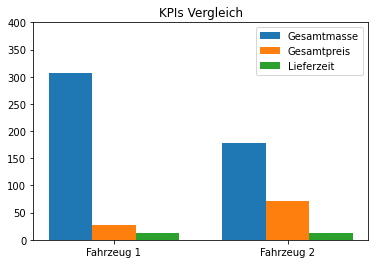

<Figure size 432x288 with 0 Axes>

In [32]:
# plot the data, save diagramm as svg-file

# importieren der Plot Datei
import matplotlib.pyplot as plt
import numpy as np



Fahrzeuge= ("Fahrzeug 1", "Fahrzeug 2")
KPI = {
    'Gesamtmasse': (307.749, 178.679),
    'Gesamtpreis': (28.031, 71.481),
    'Lieferzeit': (13, 12),
}


# the width of the bars
width = 0.25  

multiplier = 0

for attribute, measurement in KPI.items():
    offset = width * multiplier
    rects = plt.bar(x + offset, measurement, width, label=attribute)
    #plt.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.title('KPIs Vergleich')
plt.xticks(x + width, Fahrzeuge)
plt.legend(loc='upper right')
plt.ylim(0, 400)

plt.show()

plt.savefig("KPI_Vergleich.png")



Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen: Die FAIR-Prinzipien beschreiben die Punkte Findability, Accesibility, Interoperability und Reusability. 

Der Punkt Findability ist bei den KPIs durch Identifikatoren, hier in dem Fall waren es zum Beispiel die IDs Masse, Preis und Lieferzeit erfüllt.
Die Zugänglichkeit ist ebenfalls möglich, da wir in der Lage sind diese Daten abzurufen und uns hier im Jupyterhub ausgeben zu lassen.
Die Interoperabilität beschreibt die Fähigkeit unterschiedlicher Systeme, möglichst nahtlos zusammenzuarbeiten. Auch dies haben wir hier gegeben durch das Zusammenwirken von Jupyterhub mit GitLab und LeoCAD.
Zuletzt gibt es noch die Reusability. Durch die Wiederauffindbarkeit und der genauen Beschreibung der einzelnen KPIs ist die Wiederverwendbarkeit der Daten sichergestellt.

Somit entsprechen die KPIs den FAIR-Prinzipien!!

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt? Diese Lerneinheit fand ich sehr interessant und wissenswert. Die unterschiedlichen Plattformen(Jupyterhub,LeoCad und GitLab)
haben das Arbeiten und die Aufgabe sehr interessant gestaltet. In Jupyterhub habe ich durch das Objektorientierte Programmieren etwas neues dazu gelernt.
Durch das Commiten und pushen konnte ich mein erlerntes Wissen aus GDD wieder auffrischen:) 
    
Bezogen auf die Aufgabe war es interessant zu sehen, wie unterschiedliche Bauteile eines Produktes die KPIs beeinflussen und somit die 
Qualität beeinträchtigen. Durch das darauffolgende Auswerten konnte man dann die beiden Fahrzeuge hinsichtlich ihrer Qualität vergleichen.
DIes lässt nur erahnen, inwiefern in der "echten Welt" unterscheidliche Produkte hinsichtlich KPIs und Qualität mit einander verglichen werden, um daraus das "perfekte Produkt" zu entwickeln.

Aus diesem Grund ziehe ich ein positiv ausgefallenes Fazit, da dieses Lerneinheit nicht nur interessant sondern auch sehr wissenswert war!!